# 어떤 무선 청소기가 더 나을까?
* danawa사이트를 통해 청소기 제품정보를 크롤링

## 1.데이터 수집 - 한 페이지 크롤링

In [4]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium import webdriver
import urllib

In [5]:
driver = webdriver.Chrome("../driver/chromedriver.exe")

In [2]:
def search_danawa(search):
    url = "http://search.danawa.com/dsearch.php?query={}&tab=main"
    url = url.format(urllib.parse.quote(search))
    return url

In [6]:
search  = input('검색어 입력 : ')
url  = search_danawa(search)
driver.get(url)

검색어 입력 : 무선청소기


In [ ]:
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

In [15]:
prod_items = soup.select("li.prod_item")
len(prod_items)

43

In [11]:
prod_items = soup.select("ul.product_list > li.prod_item")
len(prod_items)

43

In [47]:
prod_items = soup.select("div.main_prodlist > ul.product_list > li.prod_item")
len(prod_items), type(prod_items)

(41, bs4.element.ResultSet)

In [45]:
# 상품명
title = prod_items[0]
title

<li class="prod_item" id="productItem9781572">
<input id="productItem_categoryInfo_9781572" type="hidden" value="생활가전_청소기"/>
<input id="min_price_9781572" type="hidden" value="146990"/>
<div class="prod_main_info">
<div class="thumb_image">
<a class="thumb_link" href="http://prod.danawa.com/info/?pcode=9781572&amp;keyword=무선청소기&amp;cate=103740" id="thumbLink_9781572" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
<img alt="V10" class="click_log_product_standard_img_" src="http://img.danawa.com/prod_img/500000/572/781/img/9781572_1.jpg?shrink=160:160&amp;_v=20191029140625"/>
</a>
<a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_9781572" onclick="return false;">
<span class="ico i_zoom_vw"></span>이미지보기
							</a>
<input id="hidden_cate_sub_c1" type="hidden" value="72"/>
<input id="hidden_cate_sub_c2" type="hidden" value="80"/>
<input id="hidden_cate_sub_c3" type="hidden" value="81"/>
</div>
<div class="prod_info">
<p class="prod_name">
<a c

In [21]:
# 상품명
title = prod_items[0].select("p.prod_name > a")[0].text.strip()  # text, string, get_text()
print(title)

아이로봇 브라바 390T (일반구매)


In [31]:
# spec정보 
spec_list = prod_items[0].select("div.spec_list")[0].text.strip()
print(spec_list)

로봇청소기
	 								 / 걸레전용
	 								 / 전압
	 								: 14.8V
	 								 / 충전시간
	 								: 2시간
	 								 / 사용시간
	 								: 3시간30분
	 								 / 용량
	 								: 2000mAh
	 								 / 장애물인식센서
	 								 / 추락방지센서
	 								 / 청소모드
	 								: 네비청소
	 								 / 소비전력
	 								: 14.4W
	 								 / 무게
	 								: 1.8kg
	 								 / 색상:화이트
	 								 / 크기(가로x세로x깊이): 244x79x214mm


In [38]:
# 가격정보
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",", "")

IndexError: list index out of range

In [28]:
prod_data = []
for prod_item in prod_items:
    try: # 상품명
        title = prod_item.select('p.prod_name > a')[0].text.strip()
    except:
        title = None
    
    try : # spec_list정보 가져오기 
        spec_list = prod_item.select('div.spect_list')[0].text.strip()
    except:
        spec_list = ''
        
    try:  # 가격
        price = int(prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",", ""))
    except:
        price = 0
        
    prod_data.append([title, spec_list, price])

print(len(prod_data))
print(prod_data)

43
[['아이로봇 브라바 390T (일반구매)', '', 0], ['라이프로 RX10', '', 0], ['샤오미 드리미 V10', '', '146990'], ['LG전자 코드제로 A9S A9700', '', '1014540'], ['XExuELnP0i', '', '494090'], ['삼성전자 제트 VS15R8500BF', '', '389800'], ['샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매)', '', '52720'], ['삼성전자 제트 VS20T9213QDCS', '', '650120'], ['다이슨 V10 카본파이버', '', '592560'], ['로엘 듀스핀2', '', '54900'], ['베이스어스 차량용 무선 진공 청소기 A2 (해외구매)', '', '19580'], ['삼성전자 제트 VS20T9258SDCS', '', '849000'], ['LG전자 코드제로 A9 A9100', '', '534580'], ['로엘 듀스핀', '', '54900'], ['LG전자 코드제로 A9S A9570', '', '964940'], ['일렉트로룩스 WELL Q6 WQ61-1OGG', '', '190080'], ['다이슨 V8 플러피', '', '403490'], ['샤오미 SHUNZAO 차량용 무선청소기 2세대 Z1 (해외구매)', '', '24500'], ['DIBEA TSX-25000A', '', '199000'], ['다이슨 옴니 글라이드 컴플리트+', '', '584200'], ['다이슨 디지털 슬림 플러피+', '', '697760'], ['삼성전자 제트 VS20T9213QDCSP', '', '769000'], ['LG전자 코드제로 A9S A9470', '', '890450'], ['샤오미 드리미 V11', '', '256400'], ['다이슨 V11 컴플리트', '', '828000'], ['휴스톰 HS-10000', '', '141650'], ['삼성전자 제트 VS20R9078S2', '', '651150'], ['일렉트로

In [43]:
# 상품정보 태그에서 원하는 정보를 추출하는 함수 (페이지 클릭시 호출 )
def get_prod_items(prod_item):
    prod_data = []
    
    for prod_item in prod_items:
        try: # 상품명
            title = prod_item.select('p.prod_name > a')[0].text.strip()
        except:
            title = ""

        try : # spec_list정보 가져오기 
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ''

        try:  # 가격
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",", "")
        except:
            price = 0

        prod_data.append([title, spec_list, price])
    return prod_data

### 상품정보를 가져오는 함수 테스트 

In [44]:
prod_items = soup.select("div.main_prodlist > ul.product_list > li.prod_item")
prod_data = get_prod_items(prod_items)
print(len(prod_data))
prod_data

41


[['샤오미 드리미 V10',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H12급 / 5단계여과 / 흡입력: 140AW / 흡입력: 22000Pa / 먼지통용량: 0.5L / 충전시간: 3시간30분 / 사용시간: 1시간 / 용량: 2500mAh / 구성: 바닥, 침구, 솔형, 틈새, 연장툴, 거치대 / 무게: 1.5kg / 색상:화이트 / 소비전력: 450W',
  '146990'],
 ['LG전자 코드제로 A9S A9700',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / 2중터보싸이클론 / 5단계여과 / 인버터모터 / 흡입력: 200W / 충전시간: 4시간 / 사용시간: 2시간 / 배터리: 리튬이온 (2개) / 구성: 바닥, 물걸레, 침구, 솔형, 굳은먼지, 상부청소, 틈새, 긴틈새, 매트리스, 연장툴, 거치대 / 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / WiFi / 색상:판타지실버 / 소비전력: 590W / 미세먼지인증(SLG) / 크기(가로x세로x깊이): 250x1120x260mm',
  '1014540'],
 ['XExuELnP0i', 'XExuELnP0i494090', '494090'],
 ['삼성전자 제트 VS15R8500BF',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.6V / 헤파필터 / 싸이클론 / 5단계여과 / 인버터모터 / 흡입력: 150W / 먼지통용량: 0.5L / 충전시간: 3시간30분 / 사용시간: 40분 / 배터리: 리튬이온 / 구성: 바닥, 솔형, 틈새, 거치대 / 디스플레이표시창 / 프리볼트 / 무게: 2.57kg / 색상:틸민트 / 소비전력: 410W / 알레르기인증(BAF) / 미세먼지인증(SLG) / 크기(가로x세로x깊이): 250x1123x215mm',
  '389800'],
 ['샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매)',
  '차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W /

## 2.데이터 수집  - 여러페이지 
* 다나와 검색겨로가 페이지 url분석

In [50]:
def get_search_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&defaultUICategoryCode=103740&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2349&defaultVaTab=123072&tab=goods'.format(keyword, page)

kweyword  = '무선청소기'
page = 3
url  = get_search_page_url(kweyword,page)
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&volumeType=allvs&page=3&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&defaultUICategoryCode=103740&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2349&defaultVaTab=123072&tab=goods


In [56]:
#
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
driver.implicitly_wait(3)

In [67]:
keyword = '무선청소기'
total_page = 10
prod_data_total = []


for page in tqdm_notebook(range(1, total_page + 1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    prod_items = soup.select("div.main_prodlist > ul.product_list > li.prod_item")
    prod_item_list = get_prod_items(prod_items)
    
    # 추툴 데이터 저장
    prod_data_total = prod_data_total + prod_item_list

## 3.수집데이터 저장

In [68]:
import pandas as pd

In [71]:
data  = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']
data.to_excel("../data/0104_danawa_crawling_result.xlsx", index = False)

In [72]:
readData = pd.read_excel("../data/0104_danawa_crawling_result.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   스펙 목록   410 non-null    object
 2   가격      410 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.7+ KB


In [73]:
readData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   스펙 목록   410 non-null    object
 2   가격      410 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.7+ KB


In [76]:
readData.tail()

,상품명,스펙 목록,가격
405,테팔 에어포스360 에센셜,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.9V / 에어포스싸이클론...,157170
406,유니맥스 UVC-1891P,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 22.2V / 헤파필터 / 싸...,73130
407,신일산업 SVC-S4800SJ,핸디/스틱청소기 / 핸디형 / 무선형 / 전압: 4.8V / 싸이클론 / 흡입력: ...,37510
408,삼성전자 제트 VS20T9258SFCS,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.6V / 헤파필터 / 싸...,1232030
409,LG전자 코드제로 A9S A9300SK + M970S,핸디/스틱청소기+로봇청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / 2중터보싸이클...,1480500


## 4.수집된 데이터 불러오기 

In [18]:
import pandas as pd


data = pd.read_excel("../data/1_danawa_crawling_result.xlsx")
#data1 = pd.read_excel("../data/2_danawa_data_final.xlsx")

In [3]:
data.head()

,상품명,스펙 목록,가격
0,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H...,173900
1,원더스리빙 다이나킹 Z9,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 28.8V / 헤파필터 / 듀...,299000
2,LG전자 코드제로 A9 A978,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / 2중터보싸이클론 / 5단...,1005340
3,샤오미 SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매),"차량용청소기 / 무선 / 흡입력: 12,000Pa / 최대출력: 120W / 2중필...",48570
4,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 29.6V / 헤파필터 / 싸...,141000


## 5.전처리

### 5.1 회사명/모델명 정리

In [19]:
company_list = []
product_list = []

for title in data['상품명']:
    title_info = title.split(' ', 1)
    company_name = title_info[0]
    prodcut_name = title_info[1]
    
    company_list.append(company_name)
    product_list.append(prodcut_name)

In [6]:
print(len(data))
print(len(company_list))

300
300


In [20]:
print(company_list[:5])

['샤오미', '원더스리빙', 'LG전자', '샤오미', '델로라']


In [21]:
print(len(product_list))
print(product_list[:5])

300
['드리미 V10', '다이나킹 Z9', '코드제로 A9 A978', 'SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매)', 'V11 파워 300W']


### 5.2 스펙목록에서 카테고리 , 사용시간, 흡입력을 추출해서 정리

In [22]:
data['스펙 목록'][0]

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H12급 / 5단계여과 / 흡입력: 140AW / 흡입력: 22000Pa / 먼지통용량: 0.5L / 충전시간: 3시간30분 / 사용시간: 1시간 / 용량: 2500mAh / 브러쉬: 바닥, 솔형, 틈새, 침구, 연장관 / 거치대 / 무게: 1.5kg / 색상:화이트 / 소비전력: 450W'

In [27]:
data['스펙 목록'][0].split(' / ')

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '전압: 25.2V',
 '헤파필터',
 'H12급',
 '5단계여과',
 '흡입력: 140AW',
 '흡입력: 22000Pa',
 '먼지통용량: 0.5L',
 '충전시간: 3시간30분',
 '사용시간: 1시간',
 '용량: 2500mAh',
 '브러쉬: 바닥, 솔형, 틈새, 침구, 연장관',
 '거치대',
 '무게: 1.5kg',
 '색상:화이트',
 '소비전력: 450W']

In [29]:
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '전압: 25.2V',
 '헤파필터',
 'H12급',
 '5단계여과',
 '흡입력: 140AW',
 '흡입력: 22000Pa',
 '먼지통용량: 0.5L',
 '충전시간: 3시간30분',
 '사용시간: 1시간',
 '용량: 2500mAh',
 '브러쉬: 바닥, 솔형, 틈새, 침구, 연장관',
 '거치대',
 '무게: 1.5kg',
 '색상:화이트',
 '소비전력: 450W']

In [30]:
# 카테고리 정보 추출
category = spec_list[0]
category

'핸디/스틱청소기'

In [33]:
# 사용시간, 흡입력이 포함돈 원소 추출 
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suctions_spec = spec
print('{} - {}'.format(use_time_spec, suctions_spec))

사용시간: 1시간 - 흡입력: 22000Pa


In [36]:
use_time_value = use_time_spec.split(' ')[1].strip()
suction_value = suctions_spec.split(' ')[1].strip()

print('사용시간 : {}  - 흡입력 :  {}'.format(use_time_value, suction_value))

사용시간 : 1시간  - 흡입력 :  22000Pa


In [39]:
# 카테고리 , 사용시간, 흡입력 추출
category_list = []
use_time_list = []
suction_list = []


for spec_data in data['스펙 목록']:
    spec_list = spec_data.split(' / ')
    category = spec_list[0]
    category_list.append(category)    
    
    # 사용시간, 흡입력 정보가 없는 제품을 위해 변수를 생성
    use_time_vlaue = None
    suction_value = None
    
    # spec_data에서 
    for spec in spec_list:
        if '사용시간' in spec:
            use_time_value = spec.split(' ')[1].strip()
        elif '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip()
            
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)    

In [42]:
print("\n 카테고리 : ",len(category_list), category_list[0:5])
print("\n 사용시간 : ",len(use_time_list), use_time_list[0:5])
print("\n 흡입력 : ",len(suction_list), suction_list[0:5])


 카테고리 :  300 ['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기']

 사용시간 :  300 ['1시간', '1시간5분', '80분', '30분', '1시간10분']

 흡입력 :  300 ['22000Pa', '22000Pa', '140W', '12,000Pa', '22000Pa']


### 5.3 무선 청소기 사용시간 단위 통일 시키기

In [43]:
use_time_list

['1시간',
 '1시간5분',
 '80분',
 '30분',
 '1시간10분',
 '60분',
 '17분',
 '120분',
 '60분',
 '42분',
 '40분',
 '60분',
 '80분',
 '30분',
 '30분',
 '60분',
 '60분',
 '50분',
 '80분',
 '60분',
 '120분',
 '20분',
 '50분',
 '1시간',
 '80분',
 '80분',
 '30분',
 '48분',
 '30분',
 '40분',
 '35분',
 '35분',
 '40분(강),',
 '40분(강),',
 '1시간',
 '45분',
 '40분',
 '55분',
 '55분',
 '50분',
 '30분',
 '45분',
 '20분',
 '50분',
 '18분',
 '25분',
 '50분',
 '40분',
 '30분',
 '40분',
 '30분',
 '15분',
 '15분',
 '24분',
 '50분',
 '30분',
 '30분',
 '40분',
 '80분',
 '1시간',
 '25분',
 '1시간20분',
 '12분',
 '30분',
 '60분',
 '40분',
 '42분',
 '35분',
 '30분',
 '10분',
 '12~15분',
 '60분',
 '12분',
 '30분',
 '40분',
 '20분',
 '40분',
 '40분',
 '35분',
 '1시간20분',
 '7분',
 '40분',
 '40분',
 '30분',
 '40분',
 '80분',
 '30분',
 '20~30분',
 '50분',
 '40분',
 '물걸레:',
 '40분',
 '50분',
 '80분',
 '80분',
 '30분',
 '120분',
 '40분',
 '45분',
 '50분',
 '40분',
 '40분',
 '40분',
 '40분',
 '30분',
 '60분',
 '40분',
 '80분',
 '60분',
 '40분',
 '20분',
 '40분',
 '40분',
 '30분',
 '60분',
 '35분',
 '40분',
 '1시간',
 '40분',
 '30분',
 '40분',
 '5시

In [44]:
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour) * 60 + int(minute)
    except:
        return None

In [66]:
print(convert_time_minute('20~30분'))

None


In [65]:
# 사용시간을 분 단위로 좆어하는 함수의 테스트
new_use_time_list = []
for time in use_time_list:
    time_value = convert_time_minute(time)
    new_use_time_list.append(time_value)
    #print(time, " = {}".format(time_value))
new_use_time_list

[60,
 65,
 80,
 30,
 70,
 60,
 17,
 120,
 60,
 42,
 40,
 60,
 80,
 30,
 30,
 60,
 60,
 50,
 80,
 60,
 120,
 20,
 50,
 60,
 80,
 80,
 30,
 48,
 30,
 40,
 35,
 35,
 40,
 40,
 60,
 45,
 40,
 55,
 55,
 50,
 30,
 45,
 20,
 50,
 18,
 25,
 50,
 40,
 30,
 40,
 30,
 15,
 15,
 24,
 50,
 30,
 30,
 40,
 80,
 60,
 25,
 80,
 12,
 30,
 60,
 40,
 42,
 35,
 30,
 10,
 None,
 60,
 12,
 30,
 40,
 20,
 40,
 40,
 35,
 80,
 7,
 40,
 40,
 30,
 40,
 80,
 30,
 None,
 50,
 40,
 None,
 40,
 50,
 80,
 80,
 30,
 120,
 40,
 45,
 50,
 40,
 40,
 40,
 40,
 30,
 60,
 40,
 80,
 60,
 40,
 20,
 40,
 40,
 30,
 60,
 35,
 40,
 60,
 40,
 30,
 40,
 300,
 300,
 25,
 25,
 15,
 35,
 35,
 55,
 35,
 9,
 40,
 20,
 20,
 120,
 60,
 30,
 120,
 60,
 40,
 60,
 48,
 48,
 60,
 30,
 24,
 60,
 75,
 35,
 60,
 60,
 60,
 60,
 30,
 60,
 50,
 40,
 20,
 30,
 48,
 30,
 48,
 60,
 12,
 48,
 42,
 30,
 30,
 10,
 60,
 15,
 40,
 40,
 60,
 None,
 None,
 None,
 None,
 30,
 48,
 60,
 60,
 20,
 40,
 120,
 28,
 60,
 50,
 45,
 20,
 15,
 30,
 40,
 30,
 30,
 12,


### 5.4 무선청소기 흡입력 단위 통일 시키기

In [70]:
suction_list

['22000Pa',
 '22000Pa',
 '140W',
 '12,000Pa',
 '22000Pa',
 '20000Pa',
 '12,000Pa',
 '200W',
 '220AW',
 None,
 '140W',
 '160AW',
 '140W',
 '7,000Pa',
 None,
 '200W',
 None,
 '25000Pa',
 '140W',
 None,
 '200W',
 '60W',
 '25000Pa',
 None,
 '140W',
 '140W',
 '100AW',
 None,
 None,
 '155AW',
 '25W',
 '10000Pa',
 None,
 None,
 '185AW',
 '9000Pa',
 '130W',
 None,
 None,
 None,
 '5,000Pa',
 None,
 None,
 None,
 '6,200Pa',
 '4,800Pa',
 None,
 '150W',
 '22000Pa',
 None,
 None,
 '5,800Pa',
 None,
 None,
 '22000Pa',
 None,
 '19000Pa',
 '150W',
 '140W',
 '185AW',
 '6000Pa',
 '150W',
 None,
 None,
 None,
 None,
 None,
 '22000Pa',
 None,
 None,
 '35W',
 None,
 '35AW',
 None,
 '12000Pa',
 None,
 None,
 '7000Pa',
 None,
 None,
 None,
 '155AW',
 '18500Pa',
 '18000Pa',
 '155W',
 '140W',
 '100AW',
 '7000Pa',
 None,
 '150W',
 '10400Pa',
 '150W',
 '20000Pa',
 '140W',
 None,
 '160W',
 '200W',
 '7000Pa',
 None,
 None,
 '155AW',
 '140W',
 '115W',
 '155AW',
 '17000Pa',
 None,
 '155AW',
 '140W',
 None,
 '115AW',

In [81]:
# 흡입력 단위를 통일시키는 함수 : AW = W = 100PA
def get_suction(value):
    try:
        value = value.upper()
        
        if "AW" in value or "W" in value:
            result = value.replace("A", "").replace("W", "")
            result = int(result.replace(",", ""))
        elif "PA" in value:
            result = value.replace("PA", "")
            result = int(result.replace(",", ""))/ 100
        else:
            result = None
        return result
    except:
        return None

In [84]:
new_suction_lust = []

for power in suction_list:
    #print(power)
    value = get_suction(power)
    new_suction_lust.append(value)
    
print(len(new_suction_lust))
print(new_suction_lust[0:10])

300
[220.0, 220.0, 140, 120.0, 220.0, 200.0, 120.0, 200, 220, None]


In [79]:
get_suction(suction_list[0])

In [85]:
suction_list[0]

'22000Pa'

## 6.다나와 전처리 결과를 엑셀로 저장

In [89]:
pd_data  = pd.DataFrame()

pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_lust

pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
1,핸디/스틱청소기,원더스리빙,다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
3,차량용청소기,샤오미,SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매),48570,30.0,120.0
4,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0


In [91]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기    241
물걸레청소기       39
차량용청소기       13
침구청소기         5
진공청소기         1
업소용청소기        1
Name: 카테고리, dtype: int64

In [94]:
# 핸디/스틱 청소기만 선택
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]

In [96]:
pd_data_final.to_excel("../data/22_danawa_data_final.xlsx", index = False)

# 6.데이터 분석

# 무선 청소기 모델별 비교 분석

### 데이터 살펴보기 

In [97]:
import pandas as pd

In [99]:
danawa_data = pd.read_excel('../data/22_danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
1,핸디/스틱청소기,원더스리빙,다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0


In [104]:
# 흡입력 기준 정렬
top_list = danawa_data.sort_values(['흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
13,핸디/스틱청소기,DIBEA,F20 맥스,222990,50.0,250.0
127,핸디/스틱청소기,DIBEA,X30,259000,50.0,250.0
165,핸디/스틱청소기,DIBEA,TSX-25000A,244470,45.0,250.0
143,핸디/스틱청소기,DIBEA,F20 울트라 맥스,236550,60.0,250.0
152,핸디/스틱청소기,아이룸,RS1,178000,40.0,250.0


In [105]:
top_list = danawa_data.sort_values(['사용시간'], ascending = False)
top_list.head()`

,카테고리,회사명,제품,가격,사용시간,흡입력
98,핸디/스틱청소기,보쉬,GAS18V-LI,77520,300.0,NaN
111,핸디/스틱청소기,삼성전자,제트 VS20R9074S2,845990,120.0,200.0
5,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,877880,120.0,200.0
153,핸디/스틱청소기,샤오미,이지에 YE-01,24740,120.0,NaN
109,핸디/스틱청소기,삼성전자,제트 VS20R9077Q3,931100,120.0,200.0


In [106]:
top_list = danawa_data.sort_values(['사용시간', '흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
98,핸디/스틱청소기,보쉬,GAS18V-LI,77520,300.0,NaN
5,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,877880,120.0,200.0
16,핸디/스틱청소기,삼성전자,제트 VS20R9078S3,918120,120.0,200.0
76,핸디/스틱청소기,삼성전자,제트 VS20R9074S3,870910,120.0,200.0
109,핸디/스틱청소기,삼성전자,제트 VS20R9077Q3,931100,120.0,200.0


In [108]:
# 가성대 - 가격대비 성능이 우수하다는 의미
price_mean_value = danawa_data.가격.mean()
suction_mean_value = danawa_data.흡입력.mean()
use_time_mean_value = danawa_data.사용시간.mean()


print("가격 평균값 : {}, 흡입력 평균값 : {}, 사용시간 평균값 : {}".format(price_mean_value, suction_mean_value, use_time_mean_value))

가격 평균값 : 296844.79253112036, 흡입력 평균값 : 151.8294573643411, 사용시간 평균값 : 43.87982832618026


In [110]:
conditoin_data = danawa_data[
    (danawa_data['가격'] <= price_mean_value) &
    (danawa_data['흡입력'] >= suction_mean_value) &
    (danawa_data['사용시간'] >= use_time_mean_value)
]
conditoin_data

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0
13,핸디/스틱청소기,DIBEA,F20 맥스,222990,50.0,250.0
18,핸디/스틱청소기,DIBEA,M500 퀀텀,248640,50.0,250.0
42,핸디/스틱청소기,DIBEA,F20 프로,161970,50.0,220.0
73,핸디/스틱청소기,JDL,tech 타이푼 DV-889DC-X,137160,50.0,200.0
121,핸디/스틱청소기,샤오미,드리미 V9P,216720,60.0,200.0
124,핸디/스틱청소기,캐치웰,코드엑스,219000,60.0,220.0
127,핸디/스틱청소기,DIBEA,X30,259000,50.0,250.0


# 7.데이터 시각화

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import platform
import os
# 한글 폰트 설치 
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [119]:
chart_data = danawa_data.dropna(axis=0)
len(char_data)

127

In [121]:
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

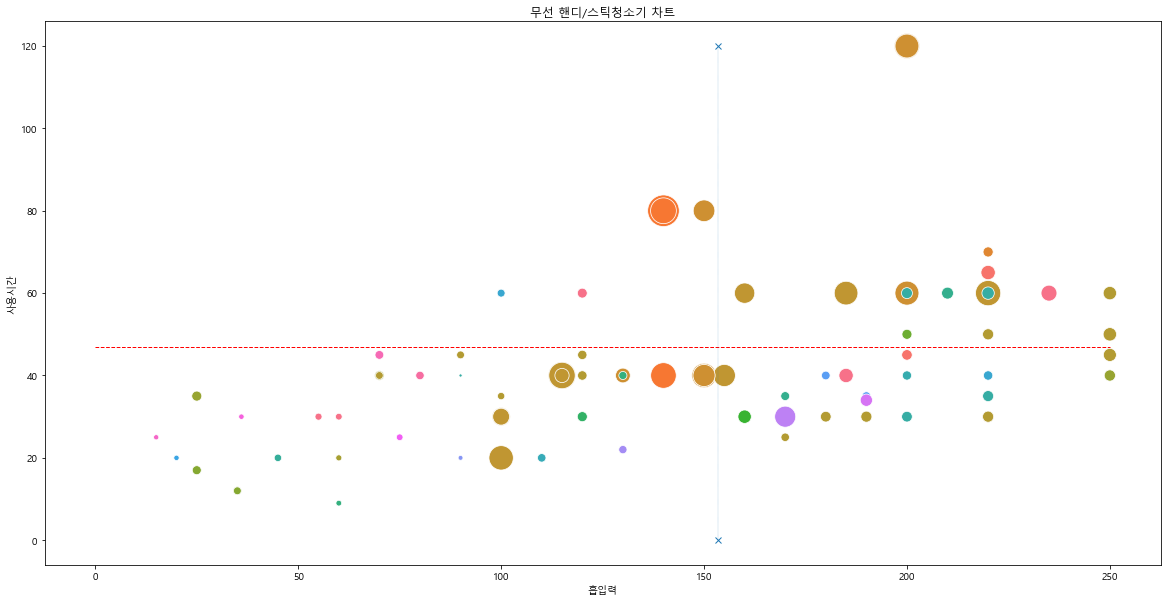

In [129]:
plt.figure(figsize =(20, 10))
plt.title('무선 핸디/스틱청소기 차트')
sns.scatterplot(x = '흡입력', y='사용시간', size = '가격', hue = char_data['회사명'],
               data = chart_data,
               sizes = (10, 1000),
               legend = False)
plt.plot([0, suction_max_value], [use_time_mean_value, use_time_mean_value],
        'r--', lw = 1)
plt.plot([suction_mean_value, suction_mean_value], [0, use_time_max_value],
        'x--', lw = 0.2)
plt.show()

## 인기 제품의 데이터 시각화

In [131]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

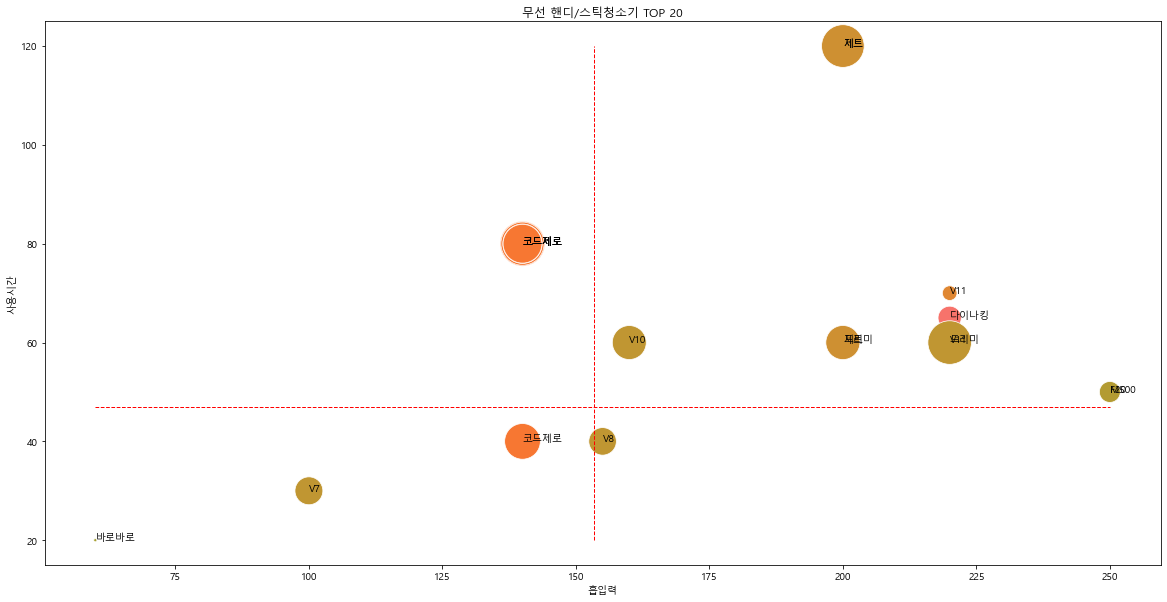

In [135]:
plt.figure(figsize =(20, 10))
plt.title('무선 핸디/스틱청소기 TOP 20')
sns.scatterplot(x = '흡입력', y='사용시간', size = '가격', hue = char_data['회사명'],
               data = chart_data_selected,
               sizes = (10, 2000),
               legend = False)

plt.plot([60, suction_max_value], [use_time_mean_value, use_time_mean_value],
        'r--', lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
        [20, use_time_max_value],
        'r--', lw = 1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size = 10)
plt.show()

In [133]:
chart_data_selected.iterrows()

<generator object DataFrame.iterrows at 0x000000BB12FE8580>